In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
import numpy as np

In [104]:
df=pd.read_csv("Train.csv")

In [105]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [106]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

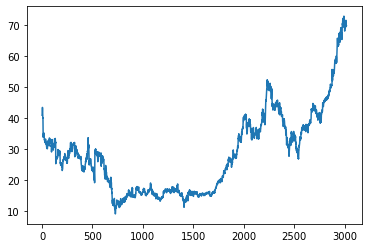

In [107]:
plt.plot(df["Close"])
plt.show()

In [120]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df["Close"]).reshape(-1,1))

In [122]:
df1.shape

(3019, 1)

In [123]:
def create_dataset(data,k):
    xdata,ydata=[],[]
    
    for i in range(len(data)-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        xdata.append(x)
        ydata.append(y)
    return np.array(xdata),np.array(ydata)
        

In [124]:
lookback=30
trainx,trainy=create_dataset(df1,lookback)

In [129]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=2)

In [130]:
x_train.shape

(2241, 30)

In [133]:
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [139]:
model=Sequential()
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["accuracy"])

In [140]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Train on 2241 samples, validate on 748 samples
Epoch 1/20
2241/2241 [==============================] - 5s 2ms/step - loss: 0.0098 - accuracy: 8.9246e-04 - val_loss: 7.5172e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
2241/2241 [==============================] - 4s 2ms/step - loss: 6.6262e-04 - accuracy: 8.9246e-04 - val_loss: 7.2155e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
2241/2241 [==============================] - 4s 2ms/step - loss: 6.2860e-04 - accuracy: 8.9246e-04 - val_loss: 6.8971e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
2241/2241 [==============================] - 4s 2ms/step - loss: 6.0342e-04 - accuracy: 8.9246e-04 - val_loss: 7.0302e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
2241/2241 [==============================] - 4s 2ms/step - loss: 5.6270e-04 - accuracy: 8.9246e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 6/20
2241/2241 [==============================] - 4s 2ms/step - loss: 8.5484e-04 - accuracy: 8.9246e-04 - val_loss: 7.0266e-04 - val_accuracy: 0.0000e+00
E

In [142]:
model.evaluate(X_test,y_test)

748/748 [==============================] - 0s 474us/step


[0.00038557450637535096, 0.0]

In [144]:
y_pred=model.predict(X_test)

In [145]:
real_y=scaler.inverse_transform(y_pred)

In [157]:
y_test_real=scaler.inverse_transform(np.reshape(y_test,(len(y_test),1)))

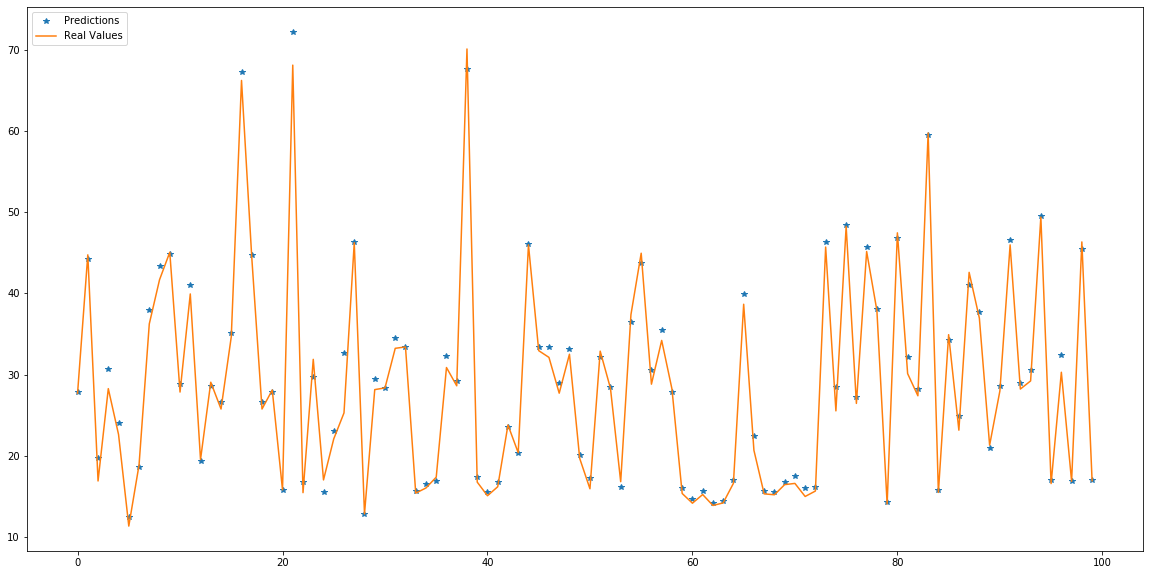

In [185]:
plt.figure(figsize=(20,10))
plt.plot(real_y[0:100],'*')
plt.plot(y_test_real[0:100])
plt.legend(['Predictions', 'Real Values'], loc='upper left')
plt.show()

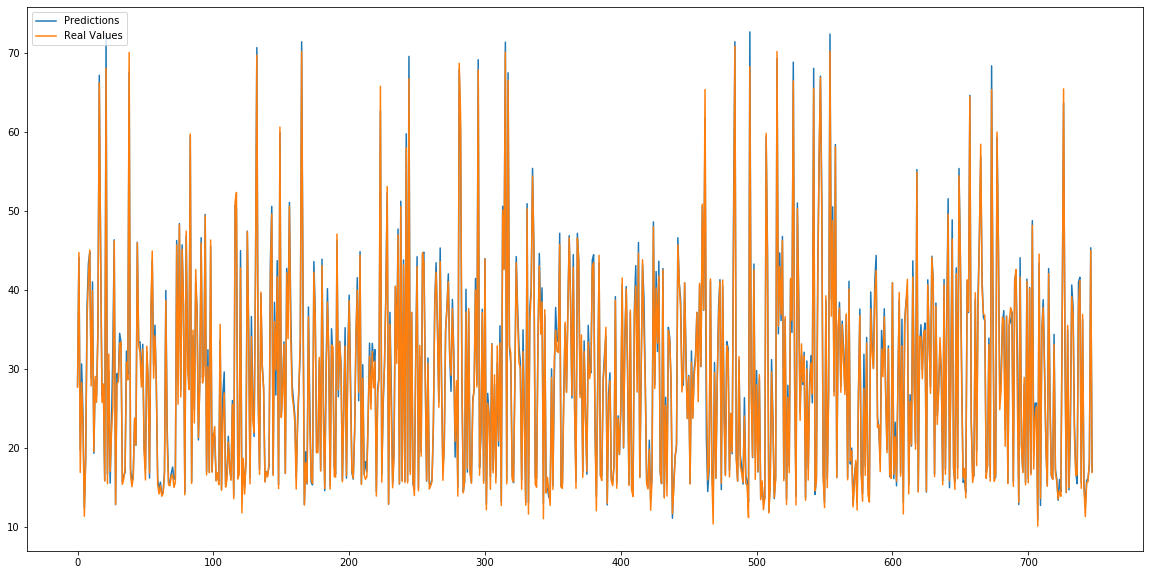

In [183]:
plt.figure(figsize=(20,10))
plt.plot(real_y)
plt.plot(y_test_real)
plt.legend(['Predictions', 'Real Values'], loc='upper left')
plt.show()

In [ ]:
plt.